In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing

In [80]:
# data
dataset = np.array([[2.7810836,2.550537003,0],
           [1.465489372,2.362125076,0],
           [3.396561688,4.400293529,0],
           [1.38807019,1.850220317,0],
           [3.06407232,3.005305973,0],
           [7.627531214,2.759262235,1],
           [5.332441248,2.088626775,1],
           [6.922596716,1.77106367,1],
           [8.675418651,-0.242068655,1],
           [7.673756466,3.508563011,1]])

In [81]:
x = dataset[:, :-1]
y = dataset[:, -1:]

In [82]:
# scale the features / mean normalization
x = preprocessing.scale(x)

In [83]:
m, n = x.shape[0], x.shape[1]

ones = np.ones((m,1))

x_train = np.hstack([ones, x])

In [84]:
clf =linear_model.LogisticRegression()
clf.fit(x,y)

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
clf.intercept_

array([0.05934746])

In [86]:
clf.coef_

array([[ 1.51008137, -0.42186444]])

In [87]:
params = np.array([[clf.intercept_[0]],[clf.coef_[:, 0:1]], [clf.coef_[:, 1:2]]])

In [88]:
y_sklearn = np.dot(x_train, params)

In [89]:
# separate out 0 and 1 classes
zeros = dataset[dataset[:, 2] == 0, 0:2]
ones = dataset[dataset[:, 2] == 1, 0:2]

In [90]:
y_pred = 1/(1+np.exp(-(np.dot(x_train, params))))

log_odds = np.log(y_pred/(1-y_pred))
x2 = (1/clf.coef_[:,1:2][0,0])* (log_odds - (clf.intercept_[0] + clf.coef_[:,0:1][0,0] *x[:, :1]))
x2

array([[ 0.12480625],
       [-0.03720505],
       [ 1.71537145],
       [-0.47738076],
       [ 0.51585214],
       [ 0.30428451],
       [-0.27238026],
       [-0.54544583],
       [-2.27649432],
       [ 0.94859187]])

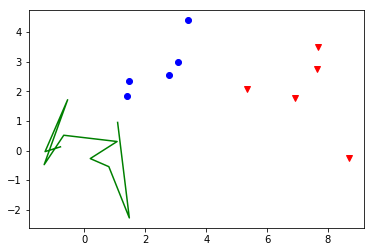

In [91]:
# data visulaziation
fig, aux = plt.subplots()
aux.plot(zeros[:,0], zeros[:,1], 'bo', ones[:,0], ones[:,1], 'rv', x[:, :1], x2, 'g-')
plt.show()